# Lab 6 - Zagadnienie klasyfikacji

### Algorytm KNN

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import csv

In [2]:
with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    X = []
    y = []
    for row in reader:
        x1, x2, lbl = float(row[0]), float(row[1]), float(row[2])
        X.append([x1, x2])
        y.append(lbl)
X = np.array(X)
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [3]:
def count_distance(x_1, x_2):
    return np.sqrt((x_1[0] - x_2[0]) ** 2 + (x_1[1] - x_2[1]) ** 2)


def classify(X, y, example, k):
    '''
    :param X: zbiór (uczący) danych postaci ndarray (m, n), gdzie m to liczba przykładów, a n liczba cech
    :param y: zbiór wartości (labels) w postaci wektora ndarray (m, ). Każdy z elementów ma wartość 0 lub 1
    :param example: wektor cech danego przykładu postaci ndarray (n, )
    :param k: parametr k algorytmu knn
    :return: predykcja klasy przykładu. 0 lub 1
    '''

    distances = []

    for index in range(X.shape[0]):
        sample = X[index]
        distance = count_distance(sample, example)
        distances.append((distance, y[index]))

    distances.sort(key=lambda a: a[0])

    head = distances[0:k]

    counter = 0
    for item in head:
        if item[1] == 1.0:
            counter += 1

    if counter > k / 2:
        return 1.0
    else:
        return 0.0

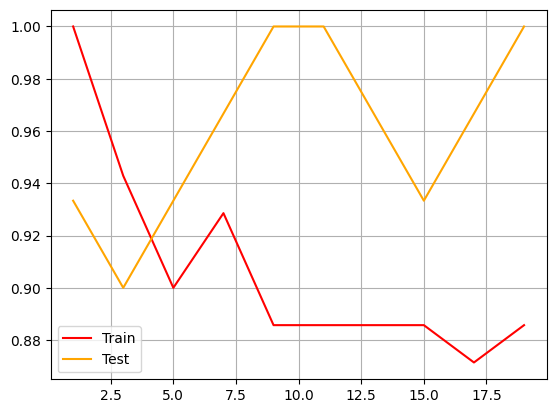

In [4]:
ks = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
accuracies_train = []
accuracies_test = []

for k in ks:
    y_pred = np.zeros(y_test.shape)
    for example_idx, example in enumerate(x_test):
        pred = classify(x_train, y_train, example, k)
        y_pred[example_idx] = pred

    y_pred_train = np.zeros(y_train.shape)
    for example_idx, example in enumerate(x_train):
        pred = classify(x_train, y_train, example, k)
        y_pred_train[example_idx] = pred

    accuracies_train.append(accuracy_score(y_train, y_pred_train))
    accuracies_test.append(accuracy_score(y_test, y_pred))

    # report = classification_report(y_test, y_pred)
    # print(f"Report: k= {k}\n{report}")

plt.plot(ks, accuracies_train, "r")
plt.plot(ks, accuracies_test, color="orange")
plt.grid()
plt.legend(["Train", "Test"])
plt.show()

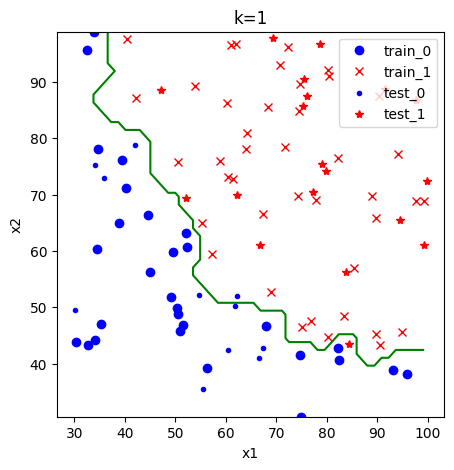

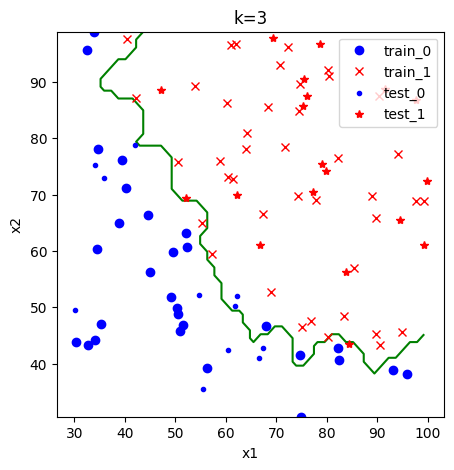

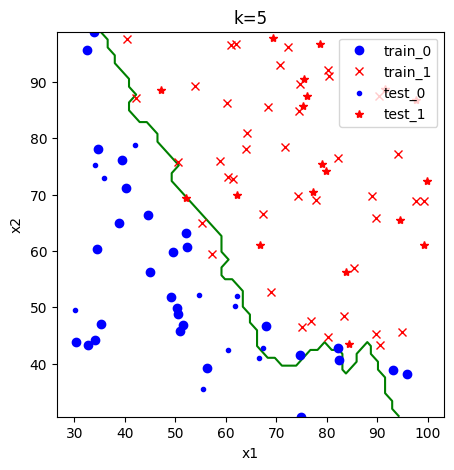

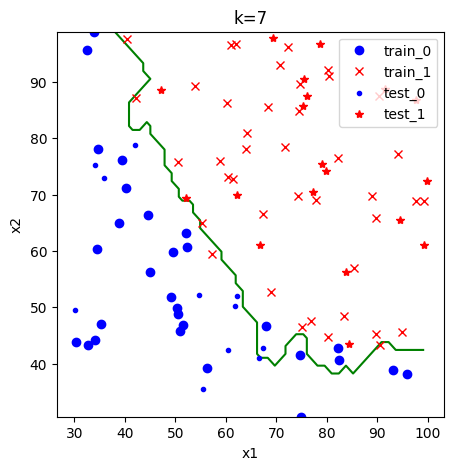

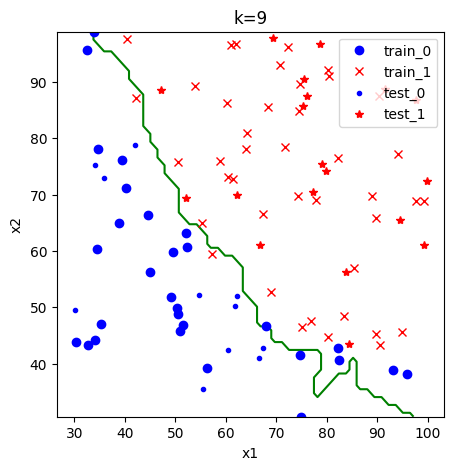

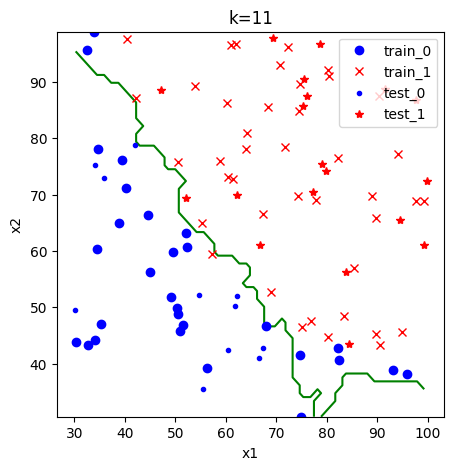

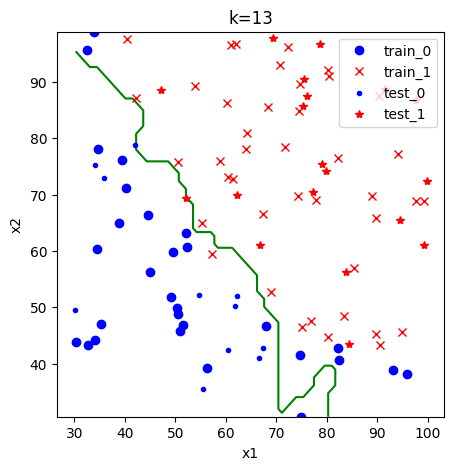

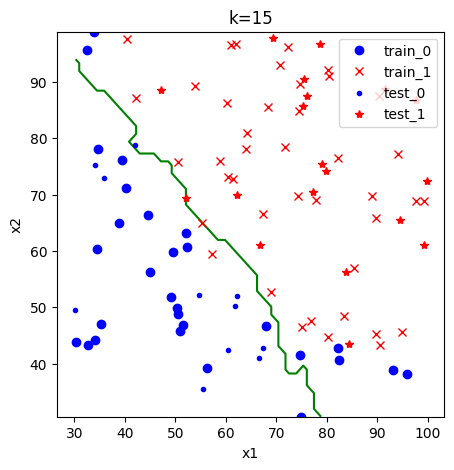

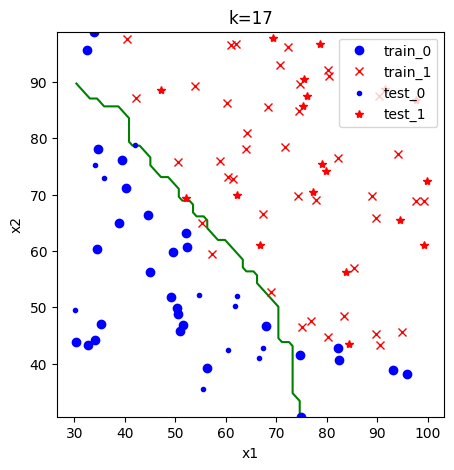

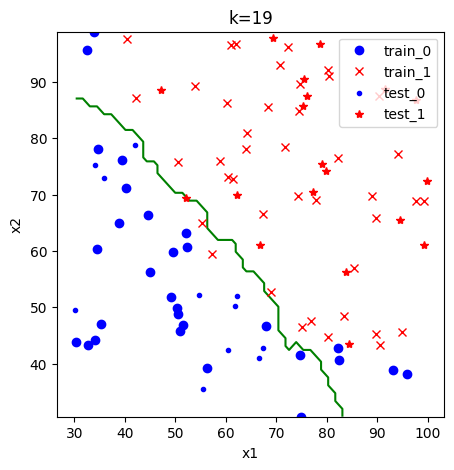

In [5]:
for k in ks:
    plt.figure(figsize=(5, 5))
    plt.title(f'k={k}')
    plt.xlabel('x1')
    plt.ylabel('x2')

    # prepare data for contour plot
    x1_res = 50
    x2_res = 50
    x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
    x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
    x1x1, x2x2 = np.meshgrid(x1, x2)
    x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]
    labels_space = np.zeros((x1_res, x2_res))
    for row_idx in range(x2_res):
        for col_idx in range(x1_res):
            example = np.array([x1[col_idx], x2[row_idx]])
            pred = classify(x_train, y_train, example, k)
            labels_space[row_idx, col_idx] = pred
    # plot decision boundary
    plt.contour(x1x1, x2x2, labels_space, levels=[0.5], colors='g')

    # plot training set
    plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
    plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')

    # plot test set
    plt.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
    plt.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')

    plt.legend(['train_0', 'train_1', 'test_0', 'test_1'])
    plt.show()

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        11
         1.0       0.95      1.00      0.97        19

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



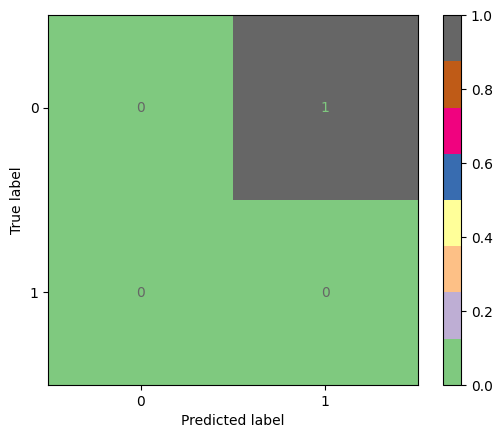

In [6]:
y_pred = np.zeros(y_test.shape)
k = 7

for example_idx, example in enumerate(x_test):
    pred = classify(x_train, y_train, example, k)
    y_pred[example_idx] = pred

print(classification_report(y_test, y_pred))
cfm = confusion_matrix(y_test, y_pred)
cfm = cfm - np.eye(cfm.shape[0]) * cfm
cfm = ConfusionMatrixDisplay(cfm)

cfm.plot(cmap='Accent')
plt.show()

### KNeighborsClassifier

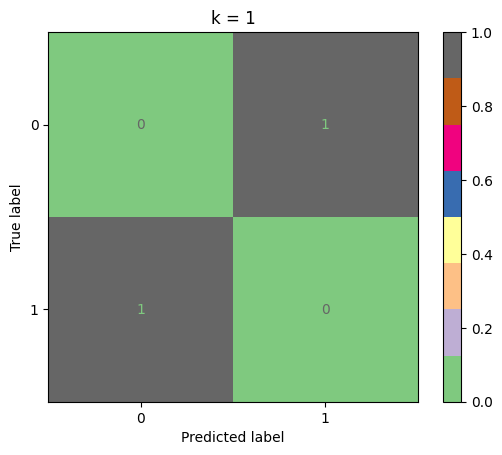

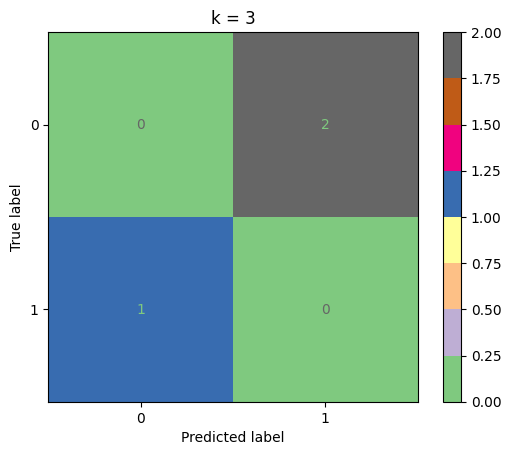

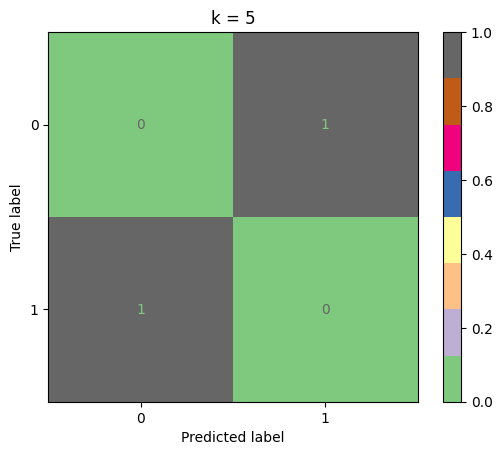

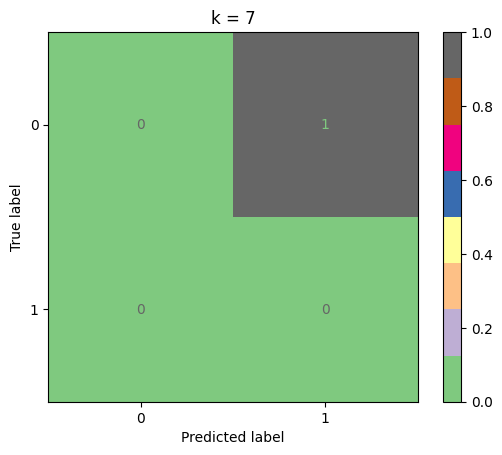

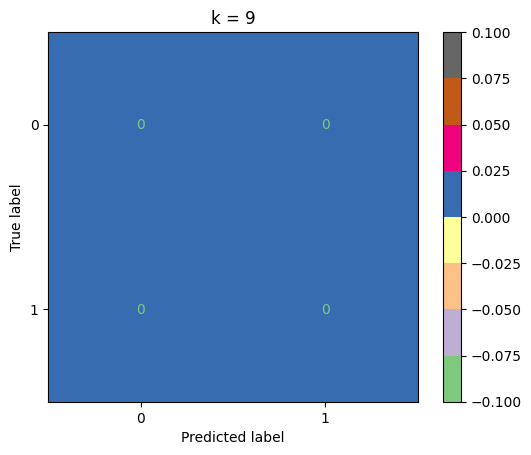

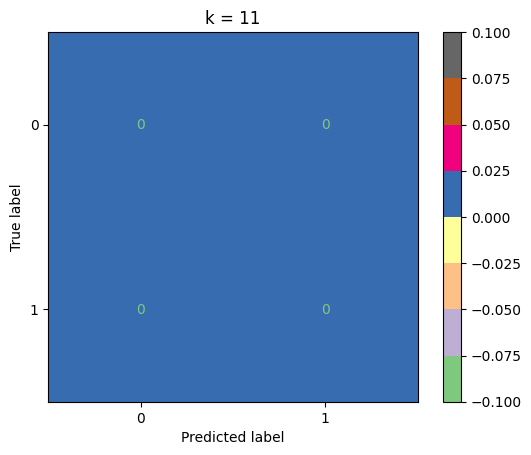

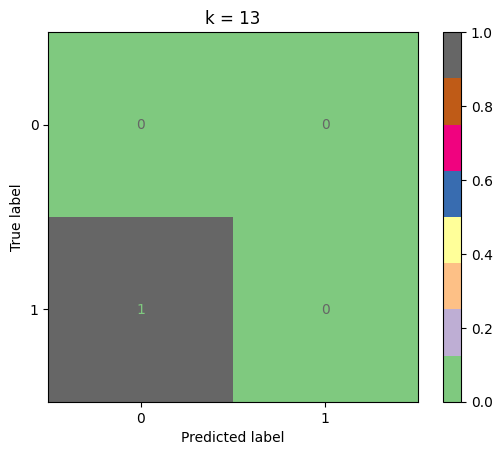

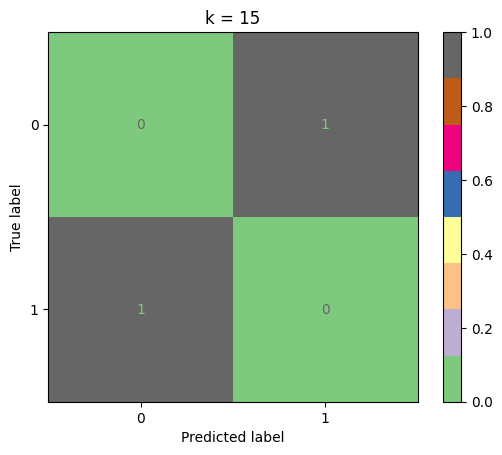

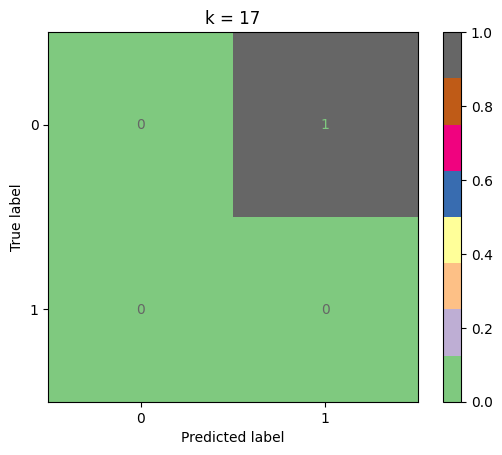

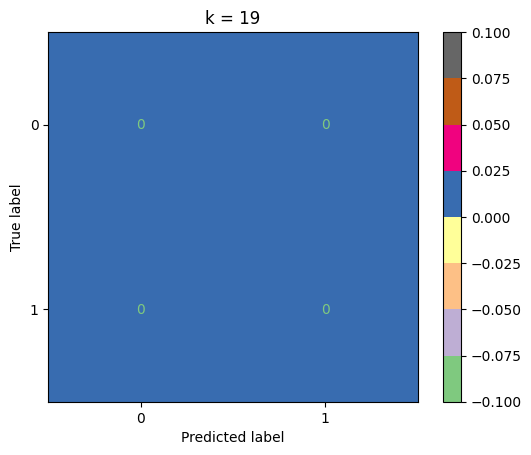

In [7]:
for k in ks:
    knn_classifier = KNeighborsClassifier(k)
    knn_classifier.fit(x_train, y_train)
    y_pred = knn_classifier.predict(x_test)

    report = classification_report(y_test, y_pred)
    cfm = confusion_matrix(y_test, y_pred)
    cfm = cfm - np.eye(cfm.shape[0]) * cfm
    cfm = ConfusionMatrixDisplay(cfm)
    cfm.plot(cmap='Accent')
    plt.title(f"k = {k}")
    plt.show()

### KNN scikit-learn - Dataset Digits

In [8]:
data = load_digits()
x = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

for k in ks:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    report = classification_report(y_test, y_pred)
    cfm = confusion_matrix(y_test, y_pred)
    print(f"k = {k}\n{report}\n\n{cfm}\n")

k = 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      0.98      0.98        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.93      0.97        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360


[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 

Najlepsze wyniki dla parametry k = 7

### scikit-learn Decision Tree - Dataset admission.txt

In [9]:
with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    X = []
    y = []
    for row in reader:
        x1, x2, lbl = float(row[0]), float(row[1]), float(row[2])
        X.append([x1, x2])
        y.append(lbl)
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lvl: 1, acc = 0.7


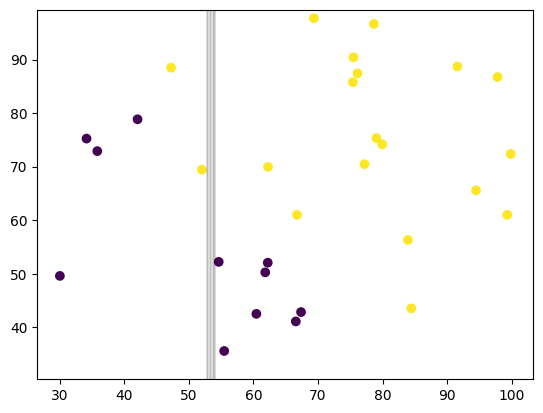

lvl: 2, acc = 0.8333333333333334


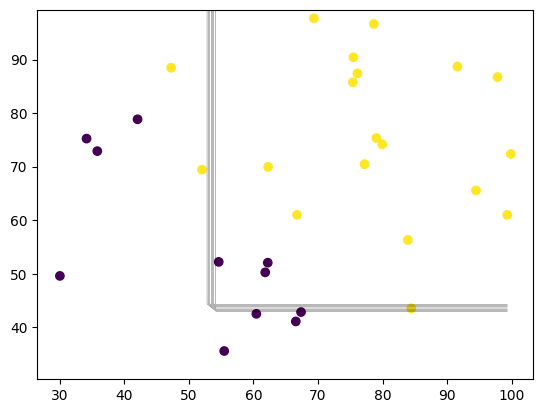

lvl: 3, acc = 0.8333333333333334


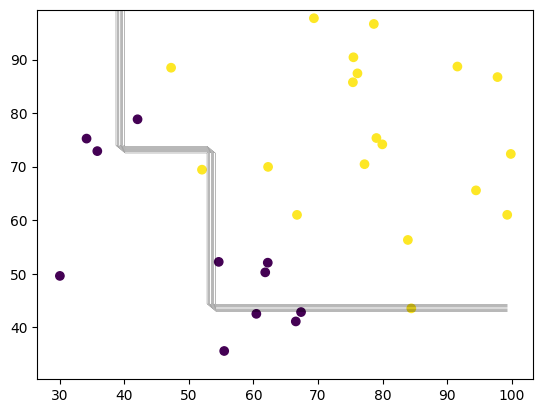

lvl: 4, acc = 0.8333333333333334


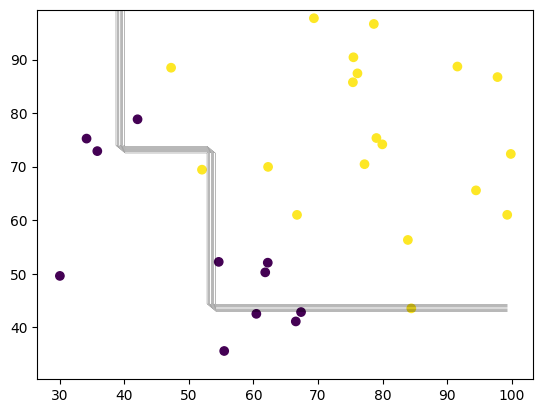

lvl: 5, acc = 0.8333333333333334


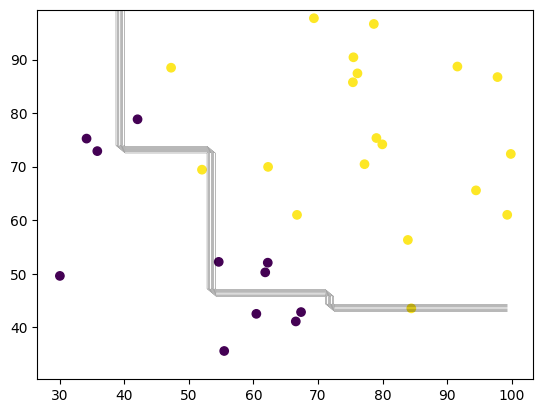

lvl: 6, acc = 0.8333333333333334


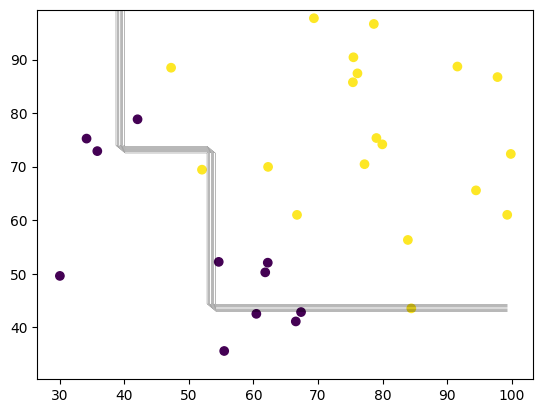

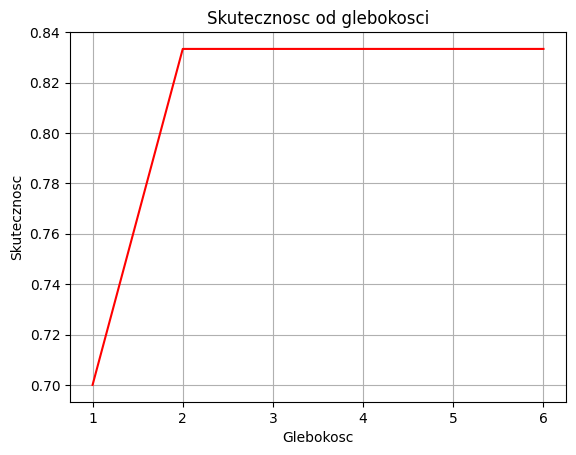

In [10]:
depths = [1, 2, 3, 4, 5, 6]
feature_1, feature_2 = np.meshgrid(np.linspace(X_train.min(), X_train.max()), np.linspace(X_train.min(), X_train.max()))
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
accuracies = []


for max_depth in depths:
    dtc = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"lvl: {max_depth}, acc = {accuracy}")

    y_pred = np.reshape(dtc.predict(grid), feature_1.shape)
    boundary = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)
    boundary.plot(plot_method="contour", colors='black', linewidths=0.2)
    boundary.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
    plt.show()

plt.plot(depths, accuracies, "-r")
plt.title("Skutecznosc od glebokosci")
plt.xlabel("Glebokosc")
plt.ylabel("Skutecznosc")
plt.grid()
plt.show()

### scikit-learn Decision Tree - Dataset Digits

In [11]:
data = load_digits()
x = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
depths = [1, 2, 3, 5, 8]
best_model = None
best_accuracy = 0
best_depth = 0

for max_depth in depths:
    dtc = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"lvl: {max_depth}, acc = {accuracy}")

    if accuracy > best_accuracy:
        best_model = y_pred
        best_accuracy = accuracy
        best_depth = max_depth

report = classification_report(y_test, best_model)
cfm = confusion_matrix(y_test, best_model)
print(f"\n\nBest depth: {best_depth}\n{report}\n\n{cfm}")

lvl: 1, acc = 0.17777777777777778
lvl: 2, acc = 0.3333333333333333
lvl: 3, acc = 0.4861111111111111
lvl: 5, acc = 0.8166666666666667
lvl: 8, acc = 0.8888888888888888


Best depth: 8
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.81      0.89      0.85        28
           2       0.84      0.82      0.83        33
           3       0.91      0.88      0.90        34
           4       0.89      0.85      0.87        46
           5       0.92      0.98      0.95        47
           6       0.94      0.94      0.94        35
           7       0.85      0.85      0.85        34
           8       0.89      0.83      0.86        30
           9       0.88      0.88      0.88        40

    accuracy                           0.89       360
   macro avg       0.89      0.89      0.89       360
weighted avg       0.89      0.89      0.89       360


[[31  0  0  0  1  0  0  1  0  0]
 [ 0 25  1  0  0  0  0  0